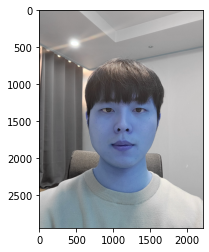

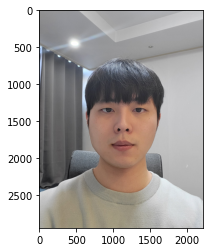

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/ioio.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

NameError: name 'c' is not defined

In [3]:
detector_hog = dlib.get_frontal_face_detector()

In [4]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(617, 1150) (1575, 2108)]]


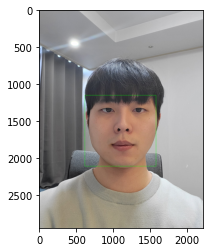

In [5]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [6]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [7]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


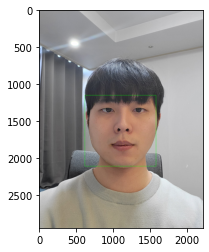

In [8]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] + dlib_rect.height()//3
    y1 = landmark[30][1]
    print("y1")
    print(y1)
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(1134, 1553)
y1
1553
(x,y) : (1134,1872)
(w,h) : (959,959)


In [10]:
j1 = zip(dlib_rects, list_landmarks)
print(j1)

In [11]:
sticker_path = os.getenv('HOME')+'/aiffel/args.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(959, 959, 3)


In [12]:
#위치 조절

refined_x = x - w // 2
refined_y = y - h
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (655,913)


In [13]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))


# import cv2
# import os
# my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/ioio.png'
# img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
# img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다




# w1 = img_show.reshape(-1,1)
# t1 = w1[:2759043]
# t2 = t1.reshape(959,959,3)
# e1 = cv2.addWeighted(t2, 2, img_sticker , 0.5, 2)
# cv2.imshow('cv2.addWeighted', e1)



(x,y) : (655,913)


계속 커널이 죽어서 addWeighted 는 쓰지 못했다... 

In [14]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


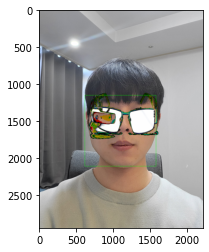

In [15]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

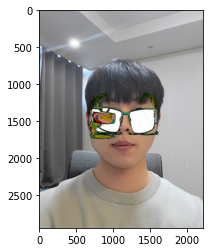

img_show.shape
(2944, 2208, 3)
img_sticker.shape
(959, 959, 3)


In [16]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()
print("img_show.shape")
print(img_show.shape)
print("img_sticker.shape")
print(img_sticker.shape)


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/ioio.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다

sticker_path = os.getenv('HOME')+'/aiffel/args.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다

print(img_bgr.shape)
print(img_sticker.shape)

w1 = img_bgr.reshape(-1,1)
t1 = w1[:858000]
t2 = t1.reshape(400,715,3)
print(t2.shape)

e1 = cv2.addWeighted(t2, 0.5 , img_sticker , 0.5, 2)
cv2.imshow('e1', e1)



자꾸 커널이 죽어서 실행하다가 오류가 계속나서 이미지를 연산하지는 못하였다!
